In [1]:
import numpy
import os
import sys
import time

from keras.models import Sequential 
from keras.layers import Activation 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
SEQ_LENGTH = 100
EPOCHS = 10
BATCH_SIZE = 128

In [4]:
text=(open("/Users/saravananjaichandar/Downloads/python_source_code.txt").read().lower())

In [6]:
INPUT_FILE_LEN = len(text)

In [7]:
chars = sorted(list(set(text)))
VOCAB_LENGTH = len(chars)

print ("Length of file: "+ str(INPUT_FILE_LEN))
print ("Total Vocab length (unique chars in input) : "+ str(VOCAB_LENGTH))

Length of file: 167057
Total Vocab length (unique chars in input) : 71


In [8]:
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

print(char_to_int)
print(int_to_char)

{'\t': 0, '\n': 1, ' ': 2, '!': 3, '"': 4, '#': 5, '$': 6, '%': 7, '&': 8, "'": 9, '(': 10, ')': 11, '*': 12, '+': 13, ',': 14, '-': 15, '.': 16, '/': 17, '0': 18, '1': 19, '2': 20, '3': 21, '4': 22, '5': 23, '6': 24, '7': 25, '8': 26, '9': 27, ':': 28, ';': 29, '<': 30, '=': 31, '>': 32, '?': 33, '@': 34, '[': 35, '\\': 36, ']': 37, '^': 38, '_': 39, '`': 40, 'a': 41, 'b': 42, 'c': 43, 'd': 44, 'e': 45, 'f': 46, 'g': 47, 'h': 48, 'i': 49, 'j': 50, 'k': 51, 'l': 52, 'm': 53, 'n': 54, 'o': 55, 'p': 56, 'q': 57, 'r': 58, 's': 59, 't': 60, 'u': 61, 'v': 62, 'w': 63, 'x': 64, 'y': 65, 'z': 66, '{': 67, '|': 68, '}': 69, 'ø': 70}
{0: '\t', 1: '\n', 2: ' ', 3: '!', 4: '"', 5: '#', 6: '$', 7: '%', 8: '&', 9: "'", 10: '(', 11: ')', 12: '*', 13: '+', 14: ',', 15: '-', 16: '.', 17: '/', 18: '0', 19: '1', 20: '2', 21: '3', 22: '4', 23: '5', 24: '6', 25: '7', 26: '8', 27: '9', 28: ':', 29: ';', 30: '<', 31: '=', 32: '>', 33: '?', 34: '@', 35: '[', 36: '\\', 37: ']', 38: '^', 39: '_', 40: '`', 41: 

In [9]:
dataX = []
dataY = []
for i in range(0, INPUT_FILE_LEN - SEQ_LENGTH, 1):
    seq_in = text[i:i + SEQ_LENGTH]
    seq_out = text[i + SEQ_LENGTH]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])

samples = len(dataX)
print( "Total samples: "+ str(samples))

# reshape X to be [samples, time steps, features]
X = numpy.reshape(dataX, (samples, SEQ_LENGTH, 1))

# normalize
X = X / float(VOCAB_LENGTH)

Total samples: 166957


In [10]:
y = np_utils.to_categorical(dataY)
print("X.shape=" + str(X.shape))
print("y.shape=" + str(y.shape))

X.shape=(166957, 100, 1)
y.shape=(166957, 71)


In [11]:
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2)) # 0.5
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 256)          264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 256)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 71)                18247     
Total params: 807,751
Trainable params: 807,751
Non-trainable params: 0
_______________

In [12]:
histroy = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
166957/166957 [==============================] - 2116s 13ms/step - loss: 2.8887
Epoch 2/10
166957/166957 [==============================] - 1996s 12ms/step - loss: 2.6343
Epoch 3/10
166957/166957 [==============================] - 1999s 12ms/step - loss: 2.4408
Epoch 4/10
166957/166957 [==============================] - 2115s 13ms/step - loss: 2.2765
Epoch 5/10
166957/166957 [==============================] - 2245s 13ms/step - loss: 2.1442
Epoch 6/10
166957/166957 [==============================] - 2029s 12ms/step - loss: 2.0324
Epoch 7/10
166957/166957 [==============================] - 2070s 12ms/step - loss: 1.9336
Epoch 8/10
166957/166957 [==============================] - 2131s 13ms/step - loss: 1.8499
Epoch 9/10
166957/166957 [==============================] - 2132s 13ms/step - loss: 1.7781
Epoch 10/10
166957/166957 [==============================] - 2137s 13ms/step - loss: 1.7167


dict_keys(['loss'])


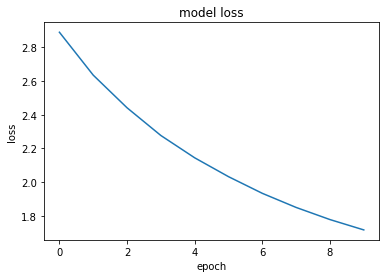

In [13]:
import matplotlib.pyplot as plt 
%matplotlib inline
# list all data in history
print(histroy.history.keys())

# summarize history for loss
plt.plot(histroy.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


In [14]:
start = numpy.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print ("input code starts with: [", ''.join([int_to_char[value] for value in pattern]), "]")
# generate characters
for i in range(500):
    x = numpy.reshape(pattern, (1, len(pattern), 1))
    x = x / float(VOCAB_LENGTH)
    prediction = model.predict(x, verbose=0)
    index = numpy.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
print("\n#####.")


input code starts with: [ ertequal(data, plaintext)

    def test_rc4_128_encrypt_decrypt(self):
        key = util.rand_bytes ]
()
            seturn self.http_post(
            self.logger.debug('[%s] connection innnented io seedired io seceired.
                                                                                                                                                                                                                                                                                                                                                                                            
#####.


In [15]:
model.save('python_code_generator.h5')